Arnie Larson

EEP 506 

4/6/2022

### Homework 1

Notes and numerical calculations for HW1

In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

### Problem 1

In the first problem we are to look at the properties of the rectangular pulse and it's spectrum.  The $rect$ function and the $sinc$ function are a fourier pair.

$s(t) = rect(\frac{t}{T}) \rightarrow S(f) = T sinc( Tf)$

And the $rect$ function has a width $T$ and the sinc function has zero crossings at $ f =\pm n\frac{1}{T}$

In this problem make extensive use of the basic Fourier transform properties of 

Linearity: $\mathcal{F}[\alpha x_1(t) + \beta x_2(t)] = \alpha S_1(f) + \beta S_2(f)$

Time Shift: $\mathcal{F}[x(t-t_o)] = e^{-j2\pi f t_o} \mathcal{F}[x(t)]$

Scaling: $\mathcal{F}[x(at)] = \frac{1}{|a|} x(\frac{f}{a})$

It is found that for

i) $s(t) = rect(\frac{t-T/2}{T}) \rightarrow S(f) = e^{-j2\pi f \frac{T}{2}} T sinc(Tf)$ with $ ZCs: \frac{1}{T}, \frac{2}{T}, ...; BW = \frac{1}{T}$

ii) $s(t) = rect(\frac{t}{W}) - rect(\frac{t - t_0}{W}); (t_0 > W) $

$S(f) = W ( 1 + e^{-j 2 \pi f t_0}) sinc ( Wf) $

$|S(f)| = 2W | cos ( \pi f t_0 ) | sinc(Wf)$ which has $ ZCs: \frac{1}{2 t_0}, \frac{3}{2 t_0}, \frac{5}{2 t_0}, ...$ and $ \frac{1}{T}, \frac{2}{T}, \frac{3}{T} ...$

$t_o \gt T \rightarrow BW = \frac{1}{2t_0}$

![Problem 1](img/PXL_20220405_163806261_2.jpg)

### Problem 2

Alternative definition of bandwidth:  Find frequency where n% of spectral energy is found. 

Use Parcevals relation $\int_{\infty}^{\infty} |S(t)|^2dt = \int_{\infty}^{\infty} |S(f)|^2df$ 


The total enegy for $rect(t)$ functions is trival to find in t.  

Here I plot the spectral energy densities of the signals in problem 1 on the positive axis and calculate the bandwidths for 90%, 95%, 99% of energy represented in the spectra.

** plots and calculations are below

![Problem 2](img/PXL_20220405_190435577.MP_2.jpg)

In [5]:
## integration routines
## sum_k { 1/2*(y_k + y_k+1)* dt }
## Note, if integrand is 0 to f, may desire a factor of 2 if using 
## Parseval which goes from -f to f, since |S(f)| is symmetric
def integrate(y, dt):
    N = y.size
    return np.sum((y[:N-1]+y[1:N])/2*dt)
    
def cumulate(y, dt):
    N = y.size
    c = np.cumsum((y[:N-1]+y[1:N])/2*dt)
    return np.insert(c, 0, 0)  # pad with 0 at front to match size of x axis
    
def get_percentile(c, prct):
    N = c.size
    for i in range(N):
        if c[i] > prct:
            return i
    return -1

fmax = 12, dt = 1.2e-05
Integration  to fmax = 0.992, (Etot = 1)
Freq of 90% BW: 0.8485568485568485
Freq of 95% BW: 2.0733380733380735
Freq of 99% BW: 10.286650286650287


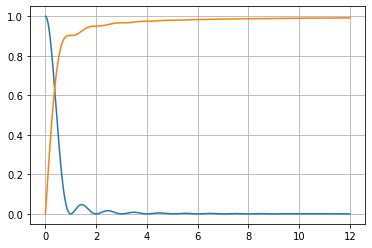

In [57]:
## First signal
## rect(t-T / T); T=1, E = T
## Find 90, 95, 99 percent BW (where energy of S(f) >= 90% of total E)

T=1; N = 1000000; fmax = 12; dt=fmax / N
Etot=T
f = np.linspace(0, fmax, N)
S = T**2 * (np.sinc( T * f)**2) ## Energy density |S(f)|^2
C = 2*cumulate(S, dt)/Etot  # normalize to percentile

print("fmax = {}, dt = {}".format(fmax, dt))
print("Integration  to fmax = {:.3f}, (Etot = {})".format(2*integrate(S, dt),Etot))
print("Freq of 90% BW: {}".format(f[get_percentile(C, .9)]))
print("Freq of 95% BW: {}".format(f[get_percentile(C, .95)]))
print("Freq of 99% BW: {}".format(f[get_percentile(C, .99)]))

plt.plot(f, S, f, C)
plt.grid()


fmax = 15, dt = 1.5e-05
Integration  to fmax = 1.986 (Etot = 2)
Freq of 90% BW: 0.8262758262758263
Freq of 95% BW: 1.9276969276969278
Freq of 99% BW: 10.387915387915388


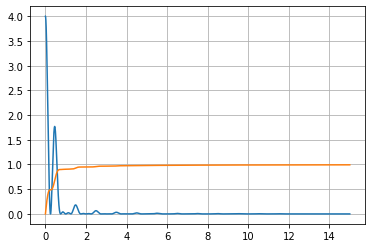

In [64]:
## Second signal
## rect(t/W) - rect(t-to/W); W=1, to = 2; E=2W
## (Note - the bandwidth does vary with ratio of t_0 to W)

W=1; to = 2;  N = 1000000; fmax = 15; dt=fmax / N
Etot = 2*W
f = np.linspace(0, fmax, N)
S = 4*(W*np.cos(np.pi*to*f))**2*np.sinc(W*f)**2 ## Energy density |S(f)|^2
C = 2*cumulate(S, dt)/Etot    ## normalizae to percentile  

print("fmax = {}, dt = {}".format(fmax, dt))
print("Integration  to fmax = {:.3f} (Etot = {})".format(2*integrate(S, dt), Etot))
print("Freq of 90% BW: {}".format(f[get_percentile(C, .9)]))
print("Freq of 95% BW: {}".format(f[get_percentile(C, .95)]))
print("Freq of 99% BW: {}".format(f[get_percentile(C, .99)]))

plt.plot(f, S, f, C)
plt.grid()

### Problem 3
  
In this problem we utilize properties of the FT to calculate the energy of the following signals. 
In each case I used the notion that integrating over $rect(f)$ signals is easy 

$x(t) = A sinc((t - t_0)/T)$

$y(t) = Asinc(t/T) \times cos(2 \pi f_o t + \theta_o)$

$z(t) = Asinc(t/T) + Bsinc((t-t_0)/T)$

** See separate hand notes for details 

For $x(t)$, use time shift property and scaling property to show 

$x(t) \rightarrow S(f) = e^{-j 2 \pi f t_o}ATrect(Tf) \rightarrow E = A^2T$

For $y(t)$, use modulation property.  Rewrite the $cos(f_o t + \theta_o)$ term as $\frac{1}{2}(e^{+j(f_o t + \theta_o)} + e^{-j(f_o t + \theta_o)})$, and use the linearity and modulation properties.  This will shift the locations of Fourier transform.

$y(t) \rightarrow S(f) = \frac{AT}{2} rect( T(f + f_o)) e^{+j \theta_o}  +  \frac{AT}{2} rect( T(f - f_o)) e^{-j \theta_o} $

When you compute the energy $\int_{\infty}^{\infty} |S(f)|^2 df$ the "cross terms cancel" and only two $\frac{A^2 T^2}{4}$ terms add, giving an energy $\rightarrow E = \frac{1}{2}A^2T$

For $z(t)$ use the linearity property and the time shift property to find an expression for the Fourier transform.  

$z(t) \rightarrow S(f) = ATrect(Tf) + BT e^{-j 2 \pi t_o f} rect ( Tf ) $

From this expression the energy can be computed

$E = \int_{\infty}^{\infty} |S(f)|^2 df = A^2T + B^2T + \frac{2ABT^2}{\pi t_o} sin(\frac{\pi t_o}{T})$



![Problem 3](img/PXL_20220405_223355007.MP.jpg)

### Problem 4

Plot the following functions, numerically calculate the energy..

$x(t) = sinc(t/T); E \rightarrow T$

$y(t) = sinc((t - t_o)/T); E \rightarrow T$

$z(t) = x(t) - y(t); E \rightarrow 2*T - 2 \frac{T^2}{\pi t_o} sin (\pi t_o / T ) $

The energy calculated roughly matches what I expected via theoretical formulas, (haven't looked into the possible error term for the 3rd signal)

Plotting x1 = sinc(t/T), s1 = |x1(t)|^2
Energy for x1: 0.993, (Etot should be 1)


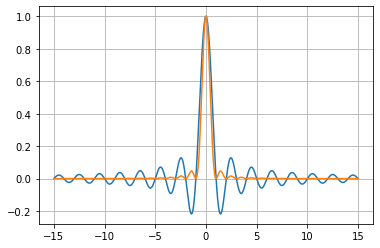

In [109]:
# Sinc in time domain, energy should be A**2 T
A=1; T=1; N = 100000; tmax = 15; dt= 2* tmax / N
Etot1 = A**2 * T
t = np.linspace(-tmax, tmax, N)
x1 = A*np.sinc(t/T)
s1 = x1*x1

plt.plot(t, x1, t, s1)
plt.grid()
print("Plotting x1 = sinc(t/T); s1 = |x1(t)|^2")
print("Energy for x1: {:.3f}, (Etot should be {})".format(integrate(s1, dt), Etot1))

Plotting x2 = sinc((t - to)/T) with to = 3.5, T = 1; s2 = |x2(t)|^2
Energy for x2: 0.993, (Etot should be 1)


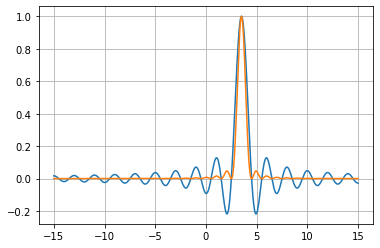

In [111]:
# Shifted Sinc in time domain, energy should be A**2 T
B=1; T=1; to = 3.5;
Etot2 = A**2 * T
# N = 100000; xmax = 15; dt= 2* xmax / N
#x = np.linspace(-xmax, xmax, N)
x2 = B*np.sinc((t-to/T))
s2 = x2*x2

plt.plot(t, x2, t, s2)
plt.grid()
print("Plotting x2 = sinc((t - to)/T) with to = 3.5, T = 1; s2 = |x2(t)|^2")
print("Energy for x2: {:.3f}, (Etot should be {})".format(integrate(s2, dt), Etot2))


Plotting x3 = A*sinc(t/T) - A*sinc((t - to)/T) with to=3.5, A=1, T=1; s2 = |x2(t)|^2
Energy for x3: 2.168, (Etot should be 2.182)


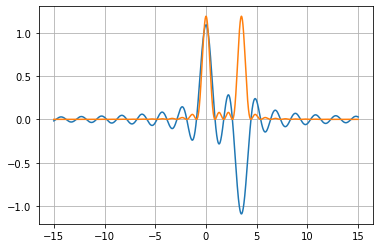

In [121]:
# Third signal is the difference of the first 2 sinc functions
# Note, although A and B are used here, I'm basically leaving it as 1
# Note - this is almost identical to problem 3, but note the sign change in Energy formula
Etot3 = T*A**2 + T*B**2 - 2*A*B*T**2/ (np.pi * to) * np.sin(np.pi * to / T)
x3 = x1 - x2
s3 = x3 * x3
plt.plot(t, x3, t, s3)
plt.grid()
print("Plotting x3 = A*sinc(t/T) - A*sinc((t - to)/T) with to=3.5, A=1, T=1; s2 = |x2(t)|^2")
print("Energy for x3: {:.3f}, (Etot should be {:.3f})".format(integrate(s3, dt), Etot3))